<div style="float:left">
    <h1 style="width:450px">Practical 5: Pandas</h1>
    <h2 style="width:450px">Easing into EDA</h2>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

<div class="alert alert-block alert-warning">
    <b>&#9888; Important</b>: Conceptually, this practical links together <em>all</em> of the preceding ones; you will find data structures, classes and methods, reading CSV files from a remote location, <tt>numpy</tt>, and more than you ever wanted to know about data types in Python. Making these connections will make the remainder of term much, much easier, so it might be worth <b>revising this practical</b> over Reading Week so make sure it all makes sense!</div>

## The Importance of Data Exploration

After a few weeks getting to grips with Python, we're now going to start working with some real data. One of the first things that we do when working with any new data set is to familiarise ourselves with it. There are a _huge_ number of ways to do this, but there are no shortcuts to:

1. Reading about the data (how it was collected, what the sample size was, etc.)
2. Reviewing any accompanying metadata (data about the data, column specs, etc.)
3. Looking at the data itself at the row- and column-levels
4. Producing descriptive statistics
5. Visualising the data using plots

You should use _all_ of these together to really understand where the data came from, how it was handled, and whether there are gaps or other problems. If you're wondering which comes first, the concept of _start with a chart_ is always good... though we've obviously not _quite_ gotten there yet! This week we want you to get a handle on pandas itself, so although we will do some plotting of charts, we'll focus on 3-4 with a tiny bit of 5. There will be much more on plotting charts next week, and you should be looking into 1 and 2 yourself based on what's been written both on the [Inside Airbnb web site](http://insideairbnb.com/about.html) and in the [suggested readings](https://github.com/jreades/i2p/blob/master/bib/Bibliography.md).

So although they don't need to be done now, you probably want to add both those links to your reading list!

### Import Required Libraries

It's always sensible to import these at the top of the notebook:

1. Because it lets everyone know what they need to have installed to run your code.
2. It's easy to run this and then skip further down the notebook if you have already done *some* of the work and saved an intermediate output.

In [1]:
import os
import numpy as np
import pandas as pd

## Task 1: Reading and Writing Data

Pandas can do a *lot*, and you might be feeling a little intimidated by this, but here's the thing: we were already writing something like pandas from scratch! That's because pandas takes a **column-view of data** in the same way that our **Dictionary-of-Lists** did, it's just that it's got a lot more features than our 'simple' tool did. That's why the documentation is so much more forbidding and why pandas is so much more powerful.

But at its heart, a pandas `Data Frame` (`df` for short) is a collection of `Data Series` objects (i.e. columns) with an index. Each Series is like one of our column-lists from the last notebook. And the `df` is like the dictionary that held the data together. So you've seen this before and you already _know_ what's going on... or at least you now have an _analogy_ that you can use to make sense of pandas:
```python
myDataFrame = {
    '<column_name_1>': <Series_1>,
    '<column_name_2>': <Series_2>,
    '<column_name_3>': <Series_3>
}
``` 

And pandas gives us two ways to access that data:

1. Using a method syntax: `myDataFrame.column_name_1`
2. Using a dictionary syntax: `myDataFrame['column_name_1']`

Depending on which syntax you prefer, you can use these interchangeably. The only times you *have* to choose one over the other are: a) assignment (e.g. `myDataFrame['column_name_1'] = ...`); b) columns with spaces in their names (e.g. `myDataFrame['Column Name 1')`).

### Task 1.1: Read Remote Data

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low (this time around).</div>

You will need to do several things here to read the remote, compressed CSV file specified by `url` into a data frame called `df`. Setting `low_memory=False` ensures that pandas will try to load the entire data set _before_ guessing the data format! Obviously, with very large files this is probably a bad idea and it's possible to force a particular column type while readng in the data as well. For larger data sets there are platforms like [Dask](https://dask.org/) (see, eg, [this](https://towardsdatascience.com/why-and-how-to-use-dask-with-big-data-746e34dac7c3)), and beyond that are [other options](https://towardsdatascience.com/scaling-pandas-comparing-dask-ray-modin-vaex-and-rapids-c74c85a4e59c).

In [15]:
# Set download URL
#host = 'https://orca.casa.ucl.ac.uk'
#path = '~jreades/data/2022-09-10-listings.csv.gz'
#url  = f'{host}/{path}'

# your code here
df = pd.read_csv('2022-09-10-listings.csv.gz', compression='gzip', low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 69,351 x 75


In [18]:
df.head()
#df.shape[0]
#print(f"Data frame is {df.shape[0]*df.shape[1]}")


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20220910194334,2022-09-11,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.93,4.75,4.82,NaN,f,2,1,1,0,0.20
1,15400,https://www.airbnb.com/rooms/15400,20220910194334,2022-09-11,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.57
2,284532,https://www.airbnb.com/rooms/284532,20220910194334,2022-09-11,city scrape,COSY STUDIO-FLAT WITH A GREAT VIEW,My very RECENTLY RENOVATED flat is located in ...,Shoreditch is simply the coolest area in London!,https://a0.muscache.com/pictures/2932872/00037...,1481412,...,4.86,4.72,4.31,NaN,f,1,1,0,0,0.34
3,106332,https://www.airbnb.com/rooms/106332,20220910194334,2022-09-11,city scrape,"Lovely large room, Bethnal Green",Lovely characterful room in a house belonging ...,NaN,https://a0.muscache.com/pictures/82437180/20b7...,264345,...,4.93,4.92,4.83,NaN,f,1,0,1,0,0.47
4,17402,https://www.airbnb.com/rooms/17402,20220910194334,2022-09-11,city scrape,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,...,4.69,4.88,4.59,NaN,f,5,5,0,0,0.36


In [19]:
df['listing_url']

0                     https://www.airbnb.com/rooms/13913
1                     https://www.airbnb.com/rooms/15400
2                    https://www.airbnb.com/rooms/284532
3                    https://www.airbnb.com/rooms/106332
4                     https://www.airbnb.com/rooms/17402
                              ...                       
69346               https://www.airbnb.com/rooms/9671724
69347              https://www.airbnb.com/rooms/20277958
69348              https://www.airbnb.com/rooms/20512703
69349              https://www.airbnb.com/rooms/49698549
69350    https://www.airbnb.com/rooms/554172169432589107
Name: listing_url, Length: 69351, dtype: object

You should get: `Data frame is 69,351 x 75`.

### Task 1.2: Inspecting the Data Frame

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low.</div>

Let's get a general sense of the data by printing out information _about_ the data frame. There are several ways to do this (and we'll see another futher on):

- `df.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)` -- descriptive stats for all **numeric** columns
- `df.info(verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None)` -- summarises all columns, but without distribution information
- `df.memory_usage(index=True, deep=False)` -- memory usage details about each column

**Quick question**: What is another term for the 0.5 percentile?

**Answer**: **??**.

#### 1.2.1 Describing

Show the 5th and 95th percentiles:

In [21]:
df.describe(percentiles=[.05, .95]) # 0.5 is always shown

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.935100e+04,6.935100e+04,6.935100e+04,69346.000000,69346.000000,0.0,69351.000000,69351.000000,69351.000000,0.0,...,51515.000000,51548.000000,51517.000000,51514.000000,0.0,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000
mean,1.373703e+17,2.022091e+13,1.242124e+08,31.047112,54.256035,NaN,51.509544,-0.128489,3.075255,NaN,...,4.790880,4.803499,4.739017,4.620849,NaN,11.987498,9.001355,2.811437,0.031391,0.882593
std,2.651479e+17,6.796924e-01,1.377104e+08,180.459655,336.219638,NaN,0.049182,0.100957,1.940233,NaN,...,0.454214,0.453838,0.420715,0.519731,NaN,37.148839,31.697957,15.762046,0.506464,1.274510
min,1.391300e+04,2.022091e+13,4.775000e+03,1.000000,1.000000,NaN,51.272480,-0.523600,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
5%,4.530436e+06,2.022091e+13,2.125620e+06,1.000000,1.000000,NaN,51.420590,-0.300245,1.000000,NaN,...,4.000000,4.000000,4.000000,3.840000,NaN,1.000000,0.000000,0.000000,0.000000,0.020000
50%,3.395467e+07,2.022091e+13,6.010350e+07,2.000000,2.000000,NaN,51.513600,-0.126200,2.000000,NaN,...,4.950000,4.980000,4.860000,4.750000,NaN,1.000000,1.000000,0.000000,0.000000,0.430000
95%,6.843427e+17,2.022091e+13,4.401124e+08,76.000000,144.000000,NaN,51.587600,0.026395,7.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,57.000000,44.000000,7.000000,0.000000,3.290000
max,7.123951e+17,2.022091e+13,4.788540e+08,2157.000000,23950.000000,NaN,51.708930,0.305150,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,285.000000,282.000000,219.000000,19.000000,51.330000


#### 1.2.2 Info

In [22]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   69351 non-null  object 
 9   host_id                                       69351 non-null 

You should get that the data frame uses about 40MB of memory and has 24 float64 columns, 17 ints, and 34 objects (text).

#### 1.2.3 Memory Usage

In [23]:
mem_usage = df.memory_usage(index=True, deep=True)
mem_usage

Index                                               128
id                                               554808
listing_url                                     6656141
scrape_id                                        554808
last_scraped                                    4646517
                                                 ...   
calculated_host_listings_count                   554808
calculated_host_listings_count_entire_homes      554808
calculated_host_listings_count_private_rooms     554808
calculated_host_listings_count_shared_rooms      554808
reviews_per_month                                554808
Length: 76, dtype: int64

#### 1.2.4 Printing the Columns

Finally, I find it *very* useful to be able to quickly print out a list of the **columns** without all of the details shown above. You just need to _print_ the _columns_ as a _list_:

In [38]:
#print(df)
print(df.columns.values.tolist())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

You should get a list showing every single column. If you get `Index(['id', 'listing_url',...], dtype='object')` then you have printed the column _index_ object and you to need to tell the object to convert its output **to a list** (*hint*: Google).

### Task 1.3: Saving the File Locally

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low</div>

Now save the file somewhere local so that you don't have to keep downloading 40MB of compressed data every time you want to start the practical. We'll be using this data for the rest of term, so you might as well save yourself some time and bandwidth! We'll talk more about data processing pipelines over the course of the term, but I'd suggest putting this data set into a `data/raw` folder because then you can have directories like `data/clean` and `data/analytical` as you move through the process of cleaning and prepping your data for analysis.

In [39]:
host = 'https://orca.casa.ucl.ac.uk'
path = '~jreades/data/2022-09-10-listings.csv.gz'
url  = f'{host}/{path}'

In [40]:
path = os.path.join('data','raw') # A default location to save raw data
fn   = url.split('/')[-1]         # What does this do?
print(f"Writing to: {fn}")

Writing to: 2022-09-10-listings.csv.gz


In [41]:
if not os.path.exists(path):      # And what does *this* do?
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Creating data/raw under /home/jovyan/work/fsds-Jon/Hansen
Done.


## Task 2: Managing Data

Although you _could_ do the next few steps as part of loading the _raw_ data, I always prefer to keep the original data set handy since I almost always discover that there are fields I didn't realise I needed when I started my work. So my approach to coding is usually:

1. Download the raw file and save it locally in a `data/raw` directory.
2. Load the first `nrows` of data so that I can quickly:
   - Check that the specification matches the data and select columns/rows accordingly.
   - Identify obviously invalid rows/columns and investigate further.
   - Check the code to fix data types and (where relevant) values works.
   - Write this new, smaller file ($m` << m$ and $n` << n$) out to a `data/clean` or `data/canonical` directory (depending on whether formatting the columns is so complex or takes so long on a large data set that it needs to be separated out from actual cleaning).
   - Test out some initial ideas for further analysis.
3. Re-run the code (remove the `nrows` limit) using the full data set.

### Task 2.1 Think Parameters

<div class="alert alert-block alert-warning"><b>Difficulty level</b>: Moderate; although the code here is simple, but the logic is not.</div>

You should always be looking for ways to _avoid_ hard-coding values that might change over time, especially those linked to the date. 

#### 2.1.1 Parameterising File Names

Ideally, if the data changes on a regular basis, I might try to work out how to make it easy to update the code to download the latest file. For instance, if the file looks like `2022-09-10-listings.csv.gz` then I might well specify the `url` as `{date}-listings.csv.gz` or `{year}-{month}-{day}-listings.csv.gz` and set up the variables that I need beforehand.

Using parameters makes it easier to write robust code that doesn't have unwanted side-effects. Here's a common one: you write code to download and process a file named `20221111-data.csv.gz`. After doing all the steps in Tasks 2 and 3 below you save it to `clean-data.csv.gz`. 

**Quick Question**: what happens when your boss asks you to process `20221211-data.csv.gz`?

**Answer**: you are going to lose every single output from the 2022-11-11 data that depends on `clean-data.csv.gz` because they are *all* going to now be generated from the 2022-12-11 data set instead. Worse, you will almost certainly have *no* way of knowing which output came from which data set (because you probably stopped tracking dates very early in your application).

#### 2.1.2 Parameterising Column Loading

In order to avoid having to load lots of data that we aren't sure we need yet, we can restrict the number of rows and columns that we load. We got `cols` by copying the output of `(df.columns.to_list()` and then removing the fields that we thought we _weren't_ interested in.

In [42]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 
        'host_since', 'host_location', 'host_about', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'license', 'reviews_per_month']

#### 1.2.2 Parameterising Row Loading

You could also do something like this to ensure that we don't load all of the rows while we're still working things out:

In [43]:
del(df) # Check we've deleted the original object

We use `del(df)` to ensure that we aren't accidentally using the 'old' data frame: after deleting it from Python's memory to free up space, we will read in a new data frame. See if you can set pandas to:
- Use the columns specified in `cols`
- Load only the first 10,000 rows using `nrows`
- Don't forget to set `low_memory=False`

In [52]:
testing = True

if testing:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, usecols=(cols), nrows=10000)
else:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, usecols=None, nrows=10000)

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 10,000 x 34


Notice how this code deliberately works the same for either testing _or_ operational execution -- we just flip between the option by changing the `testing` variable from `True` to `False`! We could use this `testing` variable throughout our code if we wanted to change other behaviours based on development/deployment context.

## Task 3: Tidying Up: an Exploration

### Task 3.1 Randomly Selected Rows

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low</div>

I often like to start my EDA by simply printint out randomly-selected rows to get a feeling for what's in the data. Does what I see square with what I read? What does the `name` look like? What do I see in `last_scraped` and is it a sensible data? What's the `id` field for?

In [53]:
df.sample(3)

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
8200,9347957.0,https://www.airbnb.com/rooms/9347957,2022-09-11,Large double room in West Dulwich,"The ROOM is very spacious, it comes with doubl...",48513988.0,Leire,2015-11-08,"Miami, FL",NaN,...,$680.00,1,1125.0,365.0,0.0,NaN,NaN,NaN,NaN,NaN
4703,6191744.0,https://www.airbnb.com/rooms/6191744,2022-09-11,room,10 minutes from Liverpool Street in single vil...,31712697.0,Vittorio,2015-04-22,"London, United Kingdom",hello I am Vittorio is a very friendly guy. Wo...,...,$25.00,1,30.0,0.0,3.0,2015-05-09,2015-06-03,2.5,NaN,0.03
4988,6445903.0,https://www.airbnb.com/rooms/6445903,2022-09-11,Beautiful 3 bed house near Arsenal,"We have a large, bright Victorian family home ...",33648056.0,Laura,2015-05-18,"London, United Kingdom",We are a hectic family of two professional adu...,...,$199.00,5,1125.0,0.0,1.0,2015-08-12,2015-08-12,5.0,NaN,0.01


#### 3.1.1 Fixing the Columns 
If you look very closely, you'll see that pandas isn't showing you the _full_ range of columns since there are 42! If you'd like to only look at specific columns then you can specify them after the sample method call using what looks like a nested list: `[[<column names as strings>]]`. I'd like you to sample: `['latitude','longitude','license','review_scores_rating','price']` only.

In [55]:
df.sample(3)[['latitude', 'longitude', 'license', 'review_scores_rating', 'price']]

,latitude,longitude,license,review_scores_rating,price
1407,51.50714,-0.12500,NaN,4.87,$137.00
8962,51.51951,-0.18435,NaN,4.73,$205.00
3609,51.54751,-0.24500,NaN,NaN,$155.00


#### 3.1.2 Fixing a Random Sample

See if you can work out from the documentation (Google search time!) how to get the same 'random' sample every time you re-run this code block:

In [62]:
df.sample(3, random_state=1)[['latitude','longitude','license','review_scores_rating','price']]

,latitude,longitude,license,review_scores_rating,price
9953,51.52041,-0.11032,NaN,4.87,$109.00
3850,51.52002,-0.21225,NaN,4.75,$138.00
4962,51.59647,-0.06546,NaN,NaN,$35.00


### Task 3.2 Dealing with NaNs and Nulls

<div class="alert alert-block alert-danger"><b>Difficulty level</b>: Hard. There is a <em>lot</em> going on here and you should be paying close attention.</div>

If you look at the sample, you should see that a number of data types that aren't 'right' for their contents: the id columns are floats; the dates aren't dates; there's a boolean that's not a boolean... It would be nice to fix these! 

<div class="alert alert-block alert-info"><b>Note</b>: I had intended to ask you to fix these by combining code from previous weeks with information provided in the lecture, but it turns out that the InsideAirbnb data set is <i>dirty</i>. There are a lot of <tt>NaN</tt> values and some of these are <i>deeply</i> problematic for some of the column types in pandas. There are also a number of challenges with other columns so, instead, I've opted to show you how I would clean this data as a <i>first pass</i> to get it into a format where it's tractable for further cleaning.</div>

#### 3.2.1 Identifying Problem Rows

The reason I'm not asking you to do this part yourselves is that it took me nearly an hour just to work out why I couldn't convert some of the columns to the right data types; then I started finding rows like these:

In [63]:
df[df.price.isna()]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
9103,10128178.0,https://www.airbnb.com/rooms/10128178,2022-09-11,Homely flat in Central Haggerston/Shoreditch,This is a lived in apartment with two medium s...,233649.0,Michelle,2010-09-13,"London, United Kingdom",Michelle McLaughlin - A professional who work...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.columns.values

array(['id', 'listing_url', 'last_scraped', 'name', 'description',
       'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'license', 'reviews_per_month'],
      dtype=object)

In [68]:
df[df.room_type.isna()]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
9103,10128178.0,https://www.airbnb.com/rooms/10128178,2022-09-11,Homely flat in Central Haggerston/Shoreditch,This is a lived in apartment with two medium s...,233649.0,Michelle,2010-09-13,"London, United Kingdom",Michelle McLaughlin - A professional who work...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df[~(df.price.str.startswith('$', na=False))]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
9103,10128178.0,https://www.airbnb.com/rooms/10128178,2022-09-11,Homely flat in Central Haggerston/Shoreditch,This is a lived in apartment with two medium s...,233649.0,Michelle,2010-09-13,"London, United Kingdom",Michelle McLaughlin - A professional who work...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9104,NaN,within an hour,82%,https://a0.muscache.com/im/pictures/user/652bf...,https://a0.muscache.com/im/pictures/user/652bf...,3.0,t,t,"London, England, United Kingdom",Hackney,...,104,2022-09-11,10.0,NaN,2.0,0,0.16,NaN,NaN,NaN


Notice that the row with index value `9104` is clearly _wrong_: if I had to guess, I'd say that it's some kind of partial extract/write process because there _are_ elements in there that look right but they are in the wrong columns. So we can _probably_ drop some of these rows, but one thing to do is look at the frequency of NaNs across the data frame _first_. So we need to look for NaNs and Nulls, but it's quite obvious that a `NaN` in the listing id is a basic problem and we should [drop these](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).

In [70]:
df[df.id.isna()][['id','listing_url','name','description','host_id','host_name','price']]

,id,listing_url,name,description,host_id,host_name,price
9104,NaN,within an hour,https://a0.muscache.com/im/pictures/user/652bf...,https://a0.muscache.com/im/pictures/user/652bf...,3.0,t,104


As always, if you don't know that's going on, break it down:

- You have seen how `[[<column names>]]` works, so that's just selecting the columns that we want to show.
- You know how `df[<selection criteria>]` works, so that isn't anything really new either!
- So the only really new part is `df.id.isna()`: `df.id` is the `id` column (we could have written this `df['id']` if we wanted) and `isna()` is a test for whether or not a value is NaN. 

So this shows that only one row in the 10,000 row sub-sample has a NaN for its id.

If you're not sure what the next line does, try breaking it down by running the inner bits before you run the `drop` command; and also try looking online for examples of how to use `df.drop` (e.g. just up above):

In [72]:
df[df.id.isna()]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
9104,NaN,within an hour,82%,https://a0.muscache.com/im/pictures/user/652bf...,https://a0.muscache.com/im/pictures/user/652bf...,3.0,t,t,"London, England, United Kingdom",Hackney,...,104,2022-09-11,10.0,NaN,2.0,0,0.16,NaN,NaN,NaN


In [73]:
df.drop(df[df.id.isna()].index.array, axis=0, inplace=True)

In [74]:
df[df.id.isna()]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month


With that really troublesome data out of the way, you can now turn to [counting NaNs or Nulls](https://www.delftstack.com/howto/python-pandas/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/#df.isnull.sum-method-to-count-nan-occurrences) in the remaining data with a view to identifying other rows that can probably be dropped.

#### 3.2.2: Counting Nulls by Column

As a starting point I would look to drop the columns that contain only NaNs. Remember that we've dropped a row from the data frame so our maximum is now $n-1$)! Notice how this next command works:
```python
# returns a data frame with all values set to True/False according to Null status
df.isnull() 
# counts these values by column (we'll see another option in a moment)
df.isnull.sum(axis=0) 
# Sort results in descending order
df.isnull.sum(axis=0).sort_values(ascending=False) 
```

In [76]:
df.isnull().sum(axis=0).sort_values(ascending=False)

license                      9999
bathrooms                    9999
host_about                   3207
reviews_per_month            2192
review_scores_rating         2192
first_review                 2192
last_review                  2192
host_location                 558
bedrooms                      269
beds                          117
bathrooms_text                 73
description                    27
name                           16
host_total_listings_count       6
host_listings_count             6
host_since                      5
host_name                       5
amenities                       1
number_of_reviews               1
availability_365                1
maximum_nights                  1
minimum_nights                  1
price                           1
room_type                       1
accommodates                    1
property_type                   1
longitude                       1
latitude                        1
host_verifications              1
host_is_superh

In [77]:
df.isnull().sum(axis=0).sort_values(ascending=False)[:12]

license                 9999
bathrooms               9999
host_about              3207
reviews_per_month       2192
review_scores_rating    2192
first_review            2192
last_review             2192
host_location            558
bedrooms                 269
beds                     117
bathrooms_text            73
description               27
dtype: int64

The most obvious ones here are:
```
license                           9999
bathrooms                         9999
host_about                        2489
```

In [78]:
df.drop(columns=['bathrooms','license','host_about'], inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9999 non-null   float64
 1   listing_url                9999 non-null   object 
 2   last_scraped               9999 non-null   object 
 3   name                       9983 non-null   object 
 4   description                9972 non-null   object 
 5   host_id                    9999 non-null   float64
 6   host_name                  9994 non-null   object 
 7   host_since                 9994 non-null   object 
 8   host_location              9441 non-null   object 
 9   host_is_superhost          9998 non-null   object 
 10  host_listings_count        9993 non-null   object 
 11  host_total_listings_count  9993 non-null   float64
 12  host_verifications         9998 non-null   object 
 13  latitude                   9998 non-null   float

Because we have dropped everything `inplace` the code simply runs and doesn't return anything.

#### 3.2.3: Counting Nulls by Row

We now know that there _are_ still quite a few problems, but we do still need a way to identify the rows that are causing most of the problems.

Notice here that the change from `axis=0` to `axis=1` changes the 'direction' of the `sum` from columns to rows. And we are getting back a data series because the summing operation reduces it to just one column.

In [80]:
df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

9103    22
7415     9
6959     9
6365     9
5697     9
4511     9
2451     8
590      7
457      7
1307     7
845      7
842      7
369      7
679      7
637      7
751      6
724      6
706      6
4965     6
6991     6
dtype: int64

So that is Series showing how many NaN values there are by index value. You should see something like:
```
9103    22
```
If we save the results to a variable called `probs` (i.e. problems) then we can decide what to do next.

<div class="alert alert-block alert-warning"><b>Note</b>: there's a chance that Python will complain why you try to run the third line of code. This is particularly likely if you are using Anaconda Python directly (i.e. not Docker). In that case you need to add the code listed at the start of Task 5.</div>

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

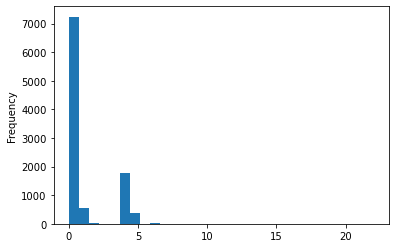

In [81]:
probs = df.isnull().sum(axis=1)
print(type(probs))       # Note that this has returned a series!
probs.plot.hist(bins=30) # Oooooooh, check out what we can do with a series!

Looking at this histogram, these look like two groups in the data so I would start there. I would take values greater than 3–5 as being ones that are most likely be problematic. We can use the index from `probs` to select out the rows we want to inspect from the main data frame.

Here's another bit of code that bears unpacking:

1. `probs > 7`: this selects only those rows in the 'probs' series whose value is greater than 7
2. `probs[...].index` returns the index values from the Series, which we will then pass to the `drop` command.
3. `df.drop(..., inplace=True)` will then drop the rows selected by `probs[probs>7].index`.

In [82]:
df.drop(probs[probs > 5].index, inplace=True)

In [83]:
print(f"Have reduced data frame to: {df.shape[0]} rows and {df.shape[1]} columns")

Have reduced data frame to: 9948 rows and 31 columns


### Task 3.3 Profiling

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low.</div>

The Pandas Profiling tool offers an alternative way of understanding what's going on in your data. You might be tempted to ask why we didn't use this straight away on the full data set -- well, if you really want to know, try copying and pasting this code back to the start of the practical and seeing what happens when you profile all 70,000-odd rows and 70-odd columns...

#### 3.3.1 Specify the Profiling Columns

Looking back over earlier code see if you can work out how to profile `latitude`, `longitude`,and `review_scores_rating` together.

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(??, title="Pandas Profiling Report")

#### 3.3.2 Profiling Targets

You can write the profile either directly into the Jupyter notebook (this file) or into a separate HTML (i.e. Web) page.

In [ ]:
profile.to_notebook_iframe()
# You can also write this profile to a web page:
# profile.to_file("your_report.html")

## Task 4. Fixing Data Types

If you want to challenge yourself, then I'd suggest trying to work out how to adapt what we saw in previous weeks using the data type dictionary to map column names to column types; however, a more straightforward way to do this is to create different for loops for each:

### Task 4.1 Managing Memory

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low.</div>

As to _why_ you'd want to fix your data types, there are two reasons: 1) to ensure that you can make the *most* of your data; 2) to ensure that it takes up as little space as possible in memory. Some simple examples:

- A column containing only `'True'` (4 bytes) and `'False'` (5 bytes) will take up much more space than a column containing only `True` and `False` (1 bit each).
- A column containing only `'Red'`, `'Green'`, and `'Blue'` (3, 5, and 4 bytes each respectively) will take up much more space that a column where we use the numbers `1, 2, 3` to represent these values and have a map that tells us `1==Red`, `2==Blue`, and `3==Green`.

Let's test this idea out:

In [ ]:
rtm = df.room_type.memory_usage(deep=True) # Room Type Memory
ctm = df.room_type.astype('category').memory_usage(deep=True) # Categorical Type Memory

print(f"The raw memory usage of `room_type` is {rtm/1000:,.0f} Kb.")
print(f"The categorical memory usage of `room_type` is {ctm/1000:,.0f} Kb.")
print(f"That's {(ctm/rtm)*100:.0f}% of the original!")

In [ ]:
shm = df.host_is_superhost.memory_usage(deep=True) # Super Host Memory
bhm = df.host_is_superhost.replace({'f':False, 't':True}).astype('bool').memory_usage(deep=True) # Boolean Host Memory

print(f"The raw memory usage of `host_is_superhost` is {shm/1000:,.0f} Kb.")
print(f"The boolean memory usage of `host_is_superhost` is {bhm/1000:,.0f} Kb.")
print(f"That's {(bhm/shm)*100:.0f}% of the original!")

### Task 4.2 Boolean Values

<div class="alert alert-block alert-warning"><b>Difficulty level</b>: Moderate.</div>

Let's start with columns that are likely to be boolean:

In [ ]:
bools = ['host_is_superhost']
df.sample(5, random_state=43)[bools]

Here we have to `map` 't' to True and 'f' to False _before_ converting the column to a boolean type. If you simply tried to replace them with the strings 'True' and 'False', then the conversion would run into the same problem as Week 3: any string that is not `None` will convert a True boolean.

In [ ]:
# This approach requires us to map 't' 
# and 'f' to True and False
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')

In [ ]:
df.sample(5, random_state=43)[bools]

### Task 4.3: Dates

<div class="alert alert-block alert-danger"><b>Difficulty level</b>: Hard.</div>

I've found dates to be particularly challenging, though pandas has _tried_ to make this process less painful than before using the `infer_datetime_format` option. What can be particularly frustrating is if a row has a non-sensical date value (e.g. `t`, as happened in 2019/20 when I taught this module) in _one_ of the datetime columns and this causes the type conversion to fail. When that happens, pandas is not always great about communicating where a problem occurred and I eventually worked it out by trying to convert _parts_ of each series in the data frame to a datetime until I had a block that failed. I then knew that I could narrow this down using integer location indexing.

In [ ]:
dates = ['last_scraped','host_since','first_review','last_review']
df.sample(5, random_state=43)[dates]

In [ ]:
for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d], infer_datetime_format=True)

In [ ]:
df.sample(5, random_state=43)[dates]

Of course, it's not actually clear there what has changed! But if you dig a little more deeply:

In [ ]:
print(df[dates[1]].dtype, "\n")
df.sample(5, random_state=45)[dates[1]].dt.strftime('%A %B %d, %Y')
# Try some other columns and other formats!

In that line of code we:
- Took a random sample (setting the state to 45)
- Took the first column from the dates list (`dates[1]`)
- Used the _date_ accessor method 
- And called `string format time` with the format `%A %B %d, %Y` (Full Day of Week, Month Name, Date, 4-digit Year)

### Task 4.4: Categories

<div class="alert alert-block alert-warning"><b>Difficulty level</b>: Moderate.</div>

We know that these are likely to be categories because there'd be no other way to allow users to effectively search Airbnb.

In [ ]:
cats = ['property_type','room_type']
df.sample(5, random_state=42)[cats]

This next piece of code is quite useful for grouping and counting operations: we are counting the occurences of each unique value in part particular column or combination of columns:

In [ ]:
df[cats[0]].value_counts()

In [ ]:
df[cats[1]].value_counts()

<div class="alert alert-block alert-success"><b>&#128161; Tip</b>: one column has <i>many</i> different values (including Campers/RVs and Yurts!), the other has just four. If I were looking to conduct research I'd probably <i>start</i> with the <tt>room_type</tt> column since I may not care about hotels and therefore never even need to decide whether I care about boutique ones!</div>

In [ ]:
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

In [ ]:
print(df[cats[1]].cat.categories.values)

In [ ]:
df.sample(5, random_state=42)[cats]

### Task 4.5: Dealing with Strings

<div class="alert alert-block alert-danger"><b>Difficulty level</b>: Hard.</div>

We'll have to put some more work into deal with the description and other more free-from text fields later in the term, but for now let's just deal with a straightforward one: price!

In [ ]:
money = ['price']
df.sample(5, random_state=42)[money]

**You will get an error when you run this**, that's because I want you to do a little thinking about how to extend the code to fix the _second_ problem. It's the same type of problem, you'll just need to figure out how to solve it by adapting code you've already got!

<div class="alert alert-block alert-info"><b>Note</b>: For now don't worry about what <tt>regex=False</tt> means. It will all make sense when we get to <em>dealing with text</em>.</div>

In [ ]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','', regex=False).astype('float')

In [ ]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','', regex=False).str.replace(??).astype('float')

In [ ]:
df.sample(5, random_state=42)[money]

In [ ]:
df.sort_values(by=money[0], ascending=False).head(10)[['id','name','price','minimum_nights']]

### Task 4.6: Dealing with Integers

<div class="alert alert-block alert-danger"><b>Difficulty level</b>: Hard.</div>

This is the issue that made me abandon the idea of making you clean the data yourselves. Although _floats_ have no issues with `np.nan` in the Series, by default there are no numpy integer arrays that can cope with NaNs. This was such a major issue for Pandas that they've actually created their _own_ data type that does support NaN values in integer columns. There are a lot of integer columns, but only one of them seems to be a problem.

In [ ]:
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

So we convert the column but using a `try / except` approach that allows to trap `ValueError` exceptions triggered by the presence of NaNs in the column. The following code tells us that there are just eight of these in the 10k sample, but they're enough to cause the code to fail if you don't trap them. The alternatives would be to: a) drop those rows; or b) leave the data as floats. For some reason the latter offends my sense of order, and the former feels like avoiding the problem rather than dealing with it.

In [ ]:
df.beds.isna().value_counts()

### Task 4.7: Validation

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low.</div>

Ordinarily, at this point I would then output information to confirm that all of the opeations I _think_ I've undertaken were correctly applied.

In [ ]:
df.info()

### Task 4.8: Saving

At this point I would save a copy of the cleaned data. And I would only consider this data _partially_ cleaned since we've not made it any further than just ensuring that each column is in an appropriate format and that some particularly problematic rows have been dropped!

In [ ]:
path = os.path.join('data','clean')

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

For the 10k sample, I get that we've reduced the working file size from 44MB to 3.1MB. So this data will be a _lot_ faster to work with for exploratory purposes.

## Task 5. Selection using Criteria

So far we've been taking primarily a row and column view of the data, now we want to think about selecting ranges from within the data set...

### Task 5.1: Selecting using Data Types

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low.</div>

If we wanted to filter in/out certain columns pandas can do that! Let's try for floats and ints (*hint*: these are 64-bit data types).

In [ ]:
df.select_dtypes(include=[??])

### Task 5.2: Selecting using Conditions

What if we wanted to find whole homes listings for more than $100/night? 

To do this we use a combination of the selection approaches above in combination with conditionals, but first we need to see what sort of properties there are in the data set! `groupby` is a really useful function that we'll come back to later in the term, but for now notice that it helps us to group the analysis by `room_type` so that subsequently asking for the `property_type` value counts allows the same `property_type` to appear in more than once place if it's associated with more than one `room_type`.

In [ ]:
df.groupby('room_type')['property_type'].value_counts()

Now try to select only the `Entire home/apt` room type:

In [ ]:
df[df.??=='??']['property_type'].value_counts().head(10)

Your output should be:
```
Entire rental unit           3907
Entire home                   821
Entire condo                  246
Entire townhouse              161
Entire loft                    77
Entire serviced apartment      34
Entire guest suite             17
Entire cottage                  8
Entire guesthouse               8
Boat                            7
```

### Task 5.3: Arbitrary Selection Criteria

Let's get a sense of where the mean and median value fall:

In [ ]:
print(f"The mean price is ${df.price.??():0.2f}")
print(f"The median price is ${df.price.??():0.2f}")

The output should be:
```
The mean price is $121.25
The median price is $80.00
```

You might want to have a [look at the documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#series): it's rather a long list, but most of your descriptive stats are on that page in the [Cumulative / Descriptive Stats](http://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats) section, and there's also lots of information about methods for [strings](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) and [categorical data](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical).

So I would take `Entire home/apt` as the right value to filter on _together with_ the price per night from the `price` column.  Why don't we set 'pricey' listings to Entire Home/Apartment listings costing more than the mean of $121/night (_note_: this is totally arbitrary)?

Here we see two things:

1. The use of the bitwise `&` (it's *not* the same as `and`).
2. The fact that you need parentheses around the selection in order to make the the `&` work.

But this will filter on two criteria simultaneously:

In [ ]:
pricey = df[(??) & (df.price>121)]
print(f"Selected {pricey.shape[0]:,} rows")

You should get: `Selected 2,496 rows`.

### Task 5.4: Selection with an Aggregate

Let's find the cheapest and most expensive listings using `min` and `max` methods:

In [ ]:
df[df.price==df.price.min()][['price','id','listing_url','room_type','description']]

You should get row **9924** priced at $10/night!

In [ ]:
df[df.price==df.price.max()][['price','id','listing_url','room_type','description']]

You should get row **8194** priced at $8,000/night! 

<div class="alert alert-block alert-danger"><b>&#9888; Stop</b>: Ask yourself if the result is <em>plausible</em>.</div>

**Quick question**: what do you make of this result?

**Answer**: ??

### Task 5.5: Selection with a Range

<div class="alert alert-block alert-warning"><b>Difficulty level</b>: Moderate</div>

Perhaps we aren't just looking for extremes... how about all of the properties falling within the middle of the distribution? We can ask for any abitrary quantile we like, so let's go with the 25th and 75th percentile to get the middle 50% of the data. Google how to get percentiles from pandas.

In [ ]:
dfr = df[ 
            (df.price > df.price.quantile(0.25)) & 
            (df.price < df.price.quantile(0.75)) ]

print(f"Lower Quartile: {df.price.quantile(0.25):>6.2f}")
print(f"Upper Quartile: {df.price.quantile(0.75):>6.2f}")
print()
print(f"Range selected contains {dfr.shape[0]:,} rows.")
print(f"Minimum price: {dfr.price.min():>6.2f}")
print(f"Maximum price: {dfr.price.max():>6.2f}")

That example contains a few things to which you need to pay attention:
1. *Again* you can see that, with mutiple selections, we had to put parentheses around each one -- this forces Python to...
2. Process the `&` (bit-wise AND) that asks pandas to "Find all the rows where condition 1 _and_ condition 2 are both `True`". So it calculates the `True`/`False` for the left side and the `True`/`False` for the right side of the `&`, and then combines them.

## Task 6: Enhancing our Understanding

### Task 6.1 Deriving a New Variable

<div class="alert alert-block alert-danger"><b>Difficulty level</b>: &#129327;</div>

Let's try calculating several derived measures of distribution for the price... these deliberately demonstrate different ways of handling this process (and notice also the little call to `apply` that can perform additional tasks).

#### 6.1.1 The *Z*-Score

The z-score is given by $z = (x - \bar{x})/\sigma$.

In [ ]:
df['z'] = (df.?? - df.??.??()) / df.??.??()
df.z.describe().apply(lambda x: f"{x:5.5f}")

#### 6.1.2 Inter-Quartile Standardisation

The IQR-standardised score is given by $i = (x - Q_{1})/(Q_{3} - Q_{1})$

In [ ]:
df['iqs'] = (df.price - ??)/(??-??)
df.iqs.describe().apply(lambda x: f"{x:5.5f}")

#### 6.1.3 Log-Normalisation

The natural log of the price is gven by $ln(x)$

In [ ]:
df['lnprice'] = np.log(??)
df.lnprice.describe().apply(lambda x: f"{x:5.5f}")

### Task 6.2. Quick (and Dirty) Plotting

One of the first things we should do when exploring a new dataset is plot (aka graph) the data. We've left plotting until a little later in this practical so that we could see some other basic attributes of how pandas stores data. We'll look at plotting and exploratory data analyses in much more detail next week, including using packages other than pandas. 

For now, let's look at the basic plotting functionality pandas provides - in conjunctions with the online documentation for both [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) and [Series](https://pandas.pydata.org/pandas-docs/stable/reference/index.html). There are also examples of all [the different types of plots pandas can produce](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

<div class="alert alert-block alert-warning"><b>&#9888; Warning</b>: MacOS users who are <i>not</i> using Docker will need to do certain things in a specific order at the start of any notebook in order to show maps or graphs. Please make a copy of the following code for any notebook that you create and make it the <i>first</i> code that you run in the notebook...</div>

```python
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
```

### Task 6.3: Histograms

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low</div>

First, let's see some of the ways we could visualise the distribution of the `Series` in the dataset:

In [ ]:
df.price.plot.hist() # histogram

If the code worked properly you should have just created a standard [histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html) plot (if you can't see one, ask for help). 

You can also pass in simple options to improve the plotting:

In [ ]:
df.price.plot.hist(bins=??); # Notice the ';' here to suppress `<AxesSubplot...>`

### Task 6.4: KDE Plots

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low</div>

Similarly, we can produce a [Kernel Density Estimate plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.kde.html) (modifying the limits of the x-axis using `xlim`):

In [ ]:
df.price.plot.kde(xlim=(0,??)); #kernel density estimate plot

Kind of handy, no? These aren't the _best_ looking plots, but they are all being generated on-the-fly for you by pandas with no more than a cheery `DataFrame.Series.plot.<plot type>`! Since those plots are all just method calls, many of them take optional parameters to change the colour, the notation (scientific or not), and other options. For example, many of the documentation pages linked to above are rather brief, but include a link to [the general options that can be applied to all `Series.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) calls.

This is why we like pandas: it allows us to be _constructively lazy_. We don't need to know _how_ a draw a KDE plot (though it always helps if you don't see what you expected), we just need to know that pandas provides a method that will do it for you. And _that_ is why it's always worth having a [look at the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html). 

#### 6.4.1 A Slight Case of Over-Plotting

Generally, Jupyter is clever enough to overlay plots one on top of the other if you call them all in the same cell. We'll see ways to gain more control later, but this is still a good start!

In [ ]:
df.z.plot.kde(xlim=[-2, 10])
df.iqs.plot.kde(xlim=[-2, 10])
df.lnprice.plot.kde();

### Task 6.5: Boxplots

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low</div>

A standard [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html):

In [ ]:
df.price.plot.box(figsize=(4, 8)); # boxplot

### Task 6.6: Scatterplots

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low</div>

We can also plot two variables in a [scatter plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter) by applying a plot method to the `DataFrame` (not an individual `Series`):

In [ ]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=2, cmap='viridis', figsize=(15,10))

Note how the code above has the form `DataFrame.plot.<plot type>`, not `DataFrame.Series.plot.<plot type>` as in the prior plots. Think about why this then means we need the `x` and `y` arguments. 

Looking at the plot produced, it's hard to see where the high values are, so we might want to think about ways that we could make it easier to spot the big numbers... We could, for instance, also vary the size of the point in a plot by some variable:

In [ ]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=(df.price/df.price.min()), cmap='viridis', figsize=(15,10))

And we can plot subsets of our data without creating a new object. See if you can work out what the following code is doing that is different from the last plot:

In [ ]:
df[df.price > df.price.quantile(0.90)].plot.scatter(x='longitude', y='latitude', c='price', cmap='viridis', s=8)

### Task 6.7: Hex Bin Plots

<div class="alert alert-block alert-success"><b>Difficulty level</b>: Low</div>

And pandas allows us to create 'less standard' plots, like a [hex bin plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html#pandas.DataFrame.plot.hexbin):

In [ ]:
df.plot.hexbin(x='longitude', y='latitude', gridsize=50, figsize=(10,7))  #hex bin plot

That's just a taste of what the basic plotting functionality of pandas can do. Feel free to explore more yourself and we'll also see [the seaborn package](http://seaborn.pydata.org/index.html) later.

## Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk), Jon Reades (jonathan.reades@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of [The MIT License](https://opensource.org/licenses/mit-license.php) and the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.

#### Potential Dependencies:
This notebook may depend on the following libraries: pandas, matplotlib